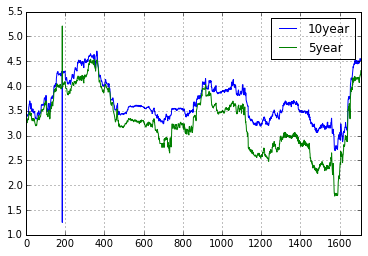

In [2]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
#load treasury 10Years data
TS10year=pd.read_excel('c:\\pythonCoding\\data\\treasury data\\10.xls',header=None,encoding='utf-8')
TS10year.columns=['date','yeild']
TS10year.set_index('date')

#load treasury 5years data
TS5year=pd.read_excel('c:\\pythonCoding\\data\\treasury data\\5.xls',header=None,encoding='utf-8')
TS5year.columns=['date','yeild']
TS5year.set_index('date')
#TS10year.plot()
#plt.show()

mergedata=pd.merge(TS10year,TS5year,on='date')#merge默认为将key相同的数据进行聚合，on指定按相同列的列名作为key
mergedata.columns=['date','10year','5year']
mergedata.set_index('date')
mergedata.plot()


In [11]:
type(TS10year['date'])
type(TS10year['date'][0])

pandas.tslib.Timestamp

In [5]:
EBRTS=pd.read_csv('C:\\pythoncoding\\data\EBR_data\\EBR-from2008.csv')
EBRTS.head()

,Date,Open,High,Low,Close,Volume,Adj Close,Unnamed: 7
0,2015/4/15,1.97,2.05,1.96,2.02,594000,2.02,NaN
1,2015/4/14,1.95,1.98,1.93,1.96,1670900,1.96,NaN
2,2015/4/13,1.94,1.97,1.92,1.92,841800,1.92,NaN
3,2015/4/10,1.94,1.96,1.93,1.94,547800,1.94,NaN
4,2015/4/9,1.95,1.98,1.93,1.94,1523800,1.94,NaN


In [10]:
EBRTS.set_index('Date')
type(EBRTS['Date'])
type(EBRTS['Date'][0])

str

#以下部分从tushare获得一年期利率调整情况，叠加到5年，10年期利率走势

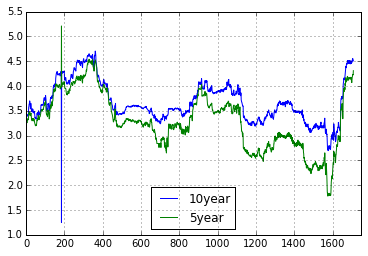

In [1]:
#coding=utf-8
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import tushare as ts

import sys
default_encoding = 'utf-8'
if sys.getdefaultencoding() != default_encoding:
    reload(sys)
    sys.setdefaultencoding(default_encoding)
    
%matplotlib inline

#load treasury 10Years data
TS10year=pd.read_excel('c:\\pythonCoding\\data\\treasury data\\10.xls',header=None,encoding='utf-8')
TS10year.columns=['date','yeild']
TS10year.set_index('date')

#load treasury 5years data
TS5year=pd.read_excel('c:\\pythonCoding\\data\\treasury data\\5.xls',header=None,encoding='utf-8')
TS5year.columns=['date','yeild']
TS5year.set_index('date')

merge5_10=pd.merge(TS10year,TS5year,on='date')#merge默认为将key相同的数据进行聚合，on指定按相同列的列名作为key
merge5_10.columns=['date','10year','5year']
merge5_10.set_index('date')

#获得加息的日期及rate
deposit=ts.get_deposit_rate()
deposit=deposit.set_index('date')
str_rate1year="定期存款整存整取(一年)"
deposit=deposit.loc[deposit['deposit_type']==str_rate1year,:]

finaldata=merge5_10.join(deposit,how='outer')
finaldata.plot()